In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib notebook
%matplotlib inline

# 3.1. - ПОЛИНОМИАЛЬНАЯ ИНТЕРПОЛЯЦИЯ

In [2]:
def omega(list_x: list, xi):
    ans = 1
    for x in list_x:
        if x - xi != 0:
            ans *= (x - xi)
    return ans


def Lagrange(list_f, list_x, x):
    Ln = 0
    for i in range(len(list_f)):
        Ln += list_f[i] * omega(list_x, x) / (x - list_x[i]) / omega(list_x, list_x[i])
    
    return -Ln


def split_difference(list_f, list_x):
    result = [list_f]
    for i in range(0, len(list_f) - 1):
        local_result = []
        for j in range(len(result[i]) - 1):
            diff = (result[i][j] - result[i][j + 1]) / (list_x[j] - list_x[j + i + 1])
            local_result.append(diff)
            
        result.append(local_result)
        
    return result
    
    
def x_mult(list_x, x, n):
    result = 1
    for i in range(n):
        result *= (x - list_x[i])
        
    return result

    
def Newton(list_f, list_x, x):
    Pn = 0
    diff_list = split_difference(list_f, list_x)
    for i in range(len(diff_list)):
        Pn += x_mult(list_x, x, i) * diff_list[i][0]
        
    return Pn
    
    
def error_rate(f, Pn, x):
    return math.fabs(f(x) - Pn(x))

In [3]:
pi = math.pi
y = lambda x: math.tan(x)

Xa = [i*pi/8 for i in range(4)]
Ya = [y(x) for x in Xa]
Xb = [0, pi/8, pi/3, 3*pi/8]
Yb = [y(x) for x in Xb]

X = 3 * pi / 16

In [4]:
print(y(X))
print()
print(Lagrange(Ya, Xa, X), error_rate(y, lambda x: Lagrange(Ya, Xa, x), X))
print(Newton(Ya, Xa, X), error_rate(y, lambda x: Newton(Ya, Xa, x), X))
print()
print(Lagrange(Yb, Xb, X), error_rate(y, lambda x: Lagrange(Yb, Xb, x), X))
print(Newton(Yb, Xb, X), error_rate(y, lambda x: Newton(Yb, Xb, x), X))

0.6681786379192989

0.6446067811865475 0.023571856732751417
0.6446067811865476 0.023571856732751306

0.5852508288281992 0.08292780909109965
0.5852508288281993 0.08292780909109954


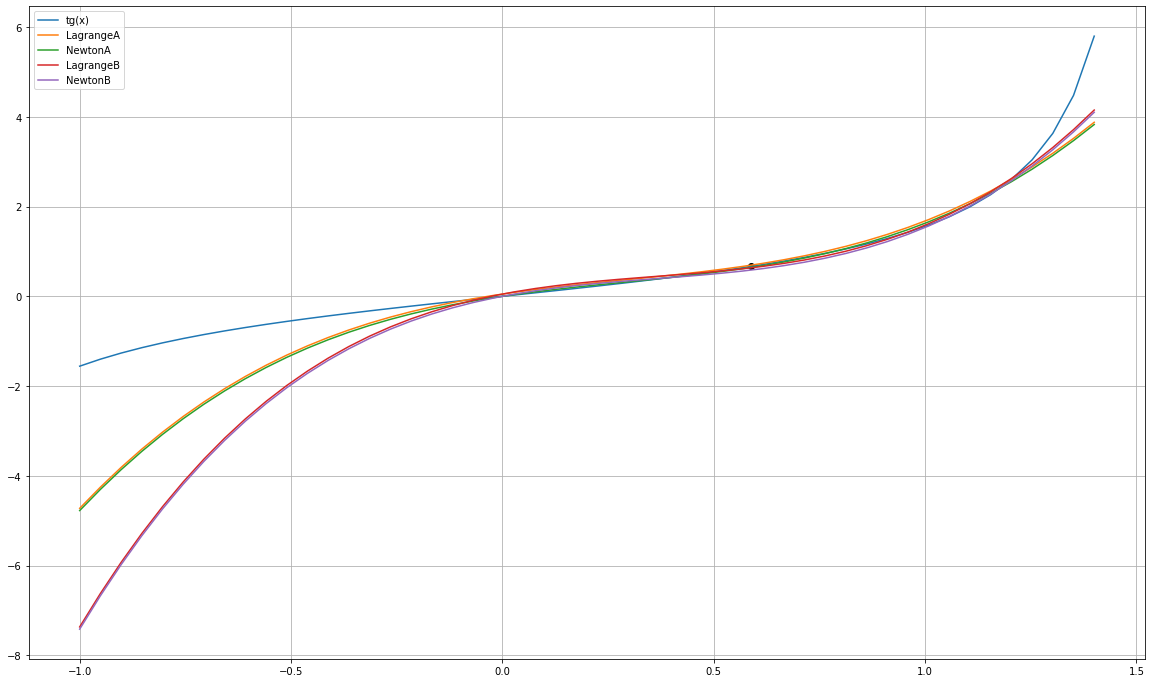

In [5]:
x = np.linspace(-1, 1.4)
y1 = [y(i) for i in x]
y2 = [Lagrange(Ya, Xa, i)+0.05 for i in x]
y3 = [Newton(Ya, Xa, i) for i in x]
y4 = [Lagrange(Yb, Xb, i)+0.05 for i in x]
y5 = [Newton(Yb, Xb, i) for i in x]


plt.figure(figsize=(20, 12))
plt.plot(x, y1, label='tg(x)')
plt.plot(x, y2, label='LagrangeA')
plt.plot(x, y3, label='NewtonA')
plt.plot(x, y4, label='LagrangeB')
plt.plot(x, y5, label='NewtonB')
plt.scatter(X, y(X), color='black')
plt.legend()
plt.grid(True)

# 3.2. - СПЛАЙН - ИНТЕРПОЛЯЦИЯ

In [6]:
def Progonka(arr) -> list:
    A = [[arr[i][j] for j in range(len(arr[i]))] for i in range(len(arr))]
    n = len(A)
    
#     for i in A:
#         print(i)

    #   Формирование массивов чисел a, b, c, d _____________
    #   a = [a0, a1, a2, ..., a_n]
    a, b, c, d = [0], [arr[0][0]], [arr[0][1]], [arr[0][2]]
    for i in arr[1:-1]:
        a.append(i[0])
        b.append(i[1])
        c.append(i[2])
        d.append(i[3])

    a.append(arr[-1][0])
    b.append(arr[-1][1])
    c.append(0)
    d.append(arr[-1][2])

#     for i in range(n):
#         if math.fabs(b[i]) < math.fabs(a[i]) + math.fabs(c[i]):
#             raise Exception

    #   Формирование массивов P, Q (Расчет значений) ((Прямой ход))

    P, Q = [-c[0] / b[0]], [d[0] / b[0]]

    for i in range(1, n):
        P.append(-c[i] / (b[i] + a[i] * P[i - 1]))
        Q.append((d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1]))

    #   Вычисление решения системы (Обратный ход)
    x = [Q[n - 1]]
    for i in range(1, n):
        x.append(P[n - 1 - i] * x[i - 1] + Q[n - 1 - i])

#     print('P:')
#     print(np.array(P))
#     print('Q:')
#     print(np.array(Q))

    x = reversed(x)
    return x


def spline_interpolations(list_f: list, list_x: list, X):
    n = len(list_f) - 1
    h = lambda i: list_x[i] - list_x[i-1]
    
    c_slau = [[2*(h(1) + h(2)), h(2), 3*((list_f[2] - list_f[1])/h(2) - (list_f[1] - list_f[0])/h(1))]]
    for i in range(3, n):     
        equation = [h(i-1), 2*(h(i-1) + h(i)), h(i), 3*((list_f[i] - list_f[i-1])/h(i) - (list_f[i-1] - list_f[i-2])/h(i-1))]
        c_slau.append(equation)
        
    equation = [h(n-1), 2*(h(n-1) + h(n)), 3*((list_f[n] - list_f[n-1])/h(n) - (list_f[n-1] - list_f[n-2])/h(n-1))]
    c_slau.append(equation)
    c = [0]
    c.extend(Progonka(c_slau))
    
    a = [i for i in list_f][:-1]
    
    b = [(list_f[i] - list_f[i-1])/h(i) - h(i)/3*(c[i] + 2*c[i-1]) for i in range(1, n)]
    b.append((list_f[n] - list_f[n-1])/(h(n)) - 2*h(n)*c[n-1]/3)
    
    d = [(c[i] - c[i-1])/3/h(i) for i in range(1, n)]
    d.append(-c[n-1]/3/h(n))
    
#     print(len(a), len(b), len(c), len(d))

    q = 0
    for i in range(1, n + 1):
        if x[i-1] <= X <= x[i]:
            q = i - 1
            
#     print('a', 'b', 'c', 'd')
#     print(a, b, c, d, sep='\n')
    return a[q] + b[q]*(X - x[q]) + c[q]*(X - x[q])**2 + d[q]*(X - x[q])**3
        

In [7]:
X = 1.5
x = [0.9 * i for i in range(5)]
f = [0, 0.36892, 0.85408, 1.7856, 6.3138]
# print(x, f, sep='\n')

# 0.724
# 0 0.23, -0.5 3.45
spline_interpolations(f, x, X)

0.7245428571428569

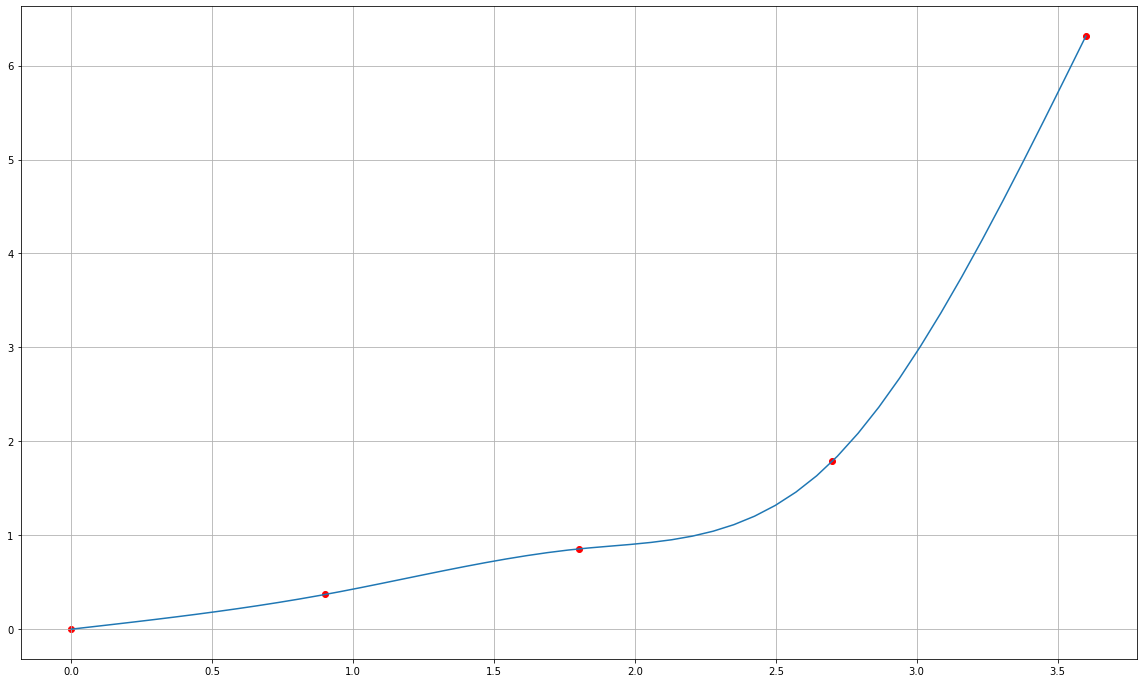

In [8]:
xi = np.linspace(0, 3.6)
y = [spline_interpolations(f, x, i) for i in xi]


plt.figure(figsize=(20, 12))
plt.grid(True)
plt.plot(xi, y)
plt.scatter(x, f, color='r')
None

# 3.3. - МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

In [9]:
def lu_dec(A):
    """
    Функция LU разложения матрицы
    :param A: Матрица, которую нужно разложить
    :return L, U: Мтарицы L, U
    """
    n = len(A)
    L = [[1 if i == j else 0 for i in range(n)] for j in range(n)]
    U = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = A[i][j] - sum([L[i][k] * U[k][j] for k in range(i)])
            else:
                L[i][j] = (A[i][j] - sum([L[i][k] * U[k][j] for k in range(j)])) / U[j][j]

    return L, U


def decision(arr, b=None):
    """
    Решение СЛАУ методом LU разложения
    :param arr: A|B
    :return x:
    """
    n = len(arr)
    if b is None:
        A = [[arr[i][j] for j in range(len(arr[i]) - 1)] for i in range(len(arr))]
        b = [arr[i][len(A[0])] for i in range(n)]
    else:
        A = arr

    L, U = lu_dec(A)

    # L * y  = b
    y = [0 for i in range(n)]
    for i in range(n):
        y[i] = (b[i] - sum([L[i][k] * y[k] for k in range(i)]))

    x = [0 for i in range(n)]

    for i in range(n - 1, -1, -1):
        x[i] = round((y[i] - sum([U[i][k] * x[k] for k in range(i + 1, n)])) / U[i][i], 4)

    return x

def MNK(y, x, degree):
    A = []
    B = []
    n = len(x)
    
    for k in range(degree + 1):
        # Возможно надо сделать условие на а00
        a = [sum([x[j]**i for j in range(n)]) 
             for i in range(k, degree + k + 1)]
        b = sum([y[i]*(x[i]**k) for i  in range(n)])
        A.append(a)
        B.append(b)
    
    return decision(A, B)
    

a1: [-0.1901, 1.2462]
ERROR1: 8.679022399599997

a2: [-0.4645, -0.1257, 0.5081]
ERROR2: 2.355748738475

a3: [0.2735, 0.2063, -0.468, 0.241]
ERROR3: 0.3557289378109995

a4: [0.0, 0.2862, 0.0957, 0.1334, -0.1194, 0.0238, 0.0016]
ERROR4: 3.657335745769026e-08


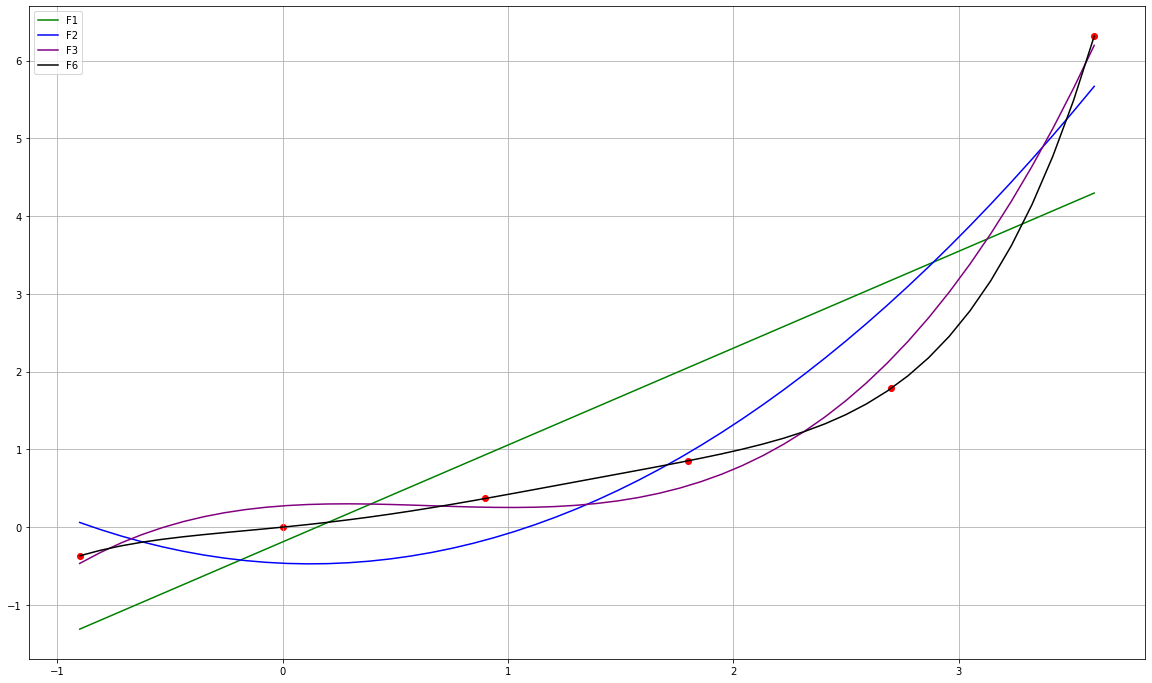

In [10]:
X = [0.9 * (-1 + i) for i in range(6)]
F = [-0.36892, 0.0, 0.36892, 0.85408, 1.7856, 6.3138]

a1 = MNK(F, X, 1)
f1 = lambda q: sum([a1[i]*(q**i) for i in range(len(a1))])
ERROR1 = sum([(f1(X[i]) - F[i])**2 for i in range(len(F))])
print('a1:', a1)
print('ERROR1:', ERROR1)

print()

a2 = MNK(F, X, 2)
f2 = lambda q: sum([a2[i]*(q**i) for i in range(len(a2))])
ERROR2 = sum([(f2(X[i]) - F[i])**2 for i in range(len(F))])
print('a2:', a2)
print('ERROR2:', ERROR2)

print()

a3 = MNK(F, X, 3)
f3 = lambda q: sum([a3[i]*(q**i) for i in range(len(a3))])
ERROR3 = sum([(f3(X[i]) - F[i])**2 for i in range(len(F))])
print('a3:', a3)
print('ERROR3:', ERROR3)

print()

a4 = MNK(F, X, 6)
f4 = lambda q: sum([a4[i]*(q**i) for i in range(len(a4))])
ERROR4 = sum([(f4(X[i]) - F[i])**2 for i in range(len(F))])
print('a4:', a4)
print('ERROR4:', ERROR4)

x1 = np.linspace(X[0], X[-1])
y1 = [f1(i) for i in x1]

x2 = np.linspace(X[0], X[-1])
y2 = [f2(i) for i in x2]

x3 = np.linspace(X[0], X[-1])
y3 = [f3(i) for i in x3]

x4 = np.linspace(X[0], X[-1])
y4 = [f4(i) for i in x4]


plt.figure(figsize=(20, 12))
plt.grid(True)
plt.plot(x1, y1, c='g', label='F1')
plt.plot(x2, y2, c='b', label='F2')
plt.plot(x3, y3, c='purple', label='F3')
plt.plot(x4, y4, c='black', label='F6')
plt.scatter(X, F, color='r')
plt.legend()
None

# 3.4. - ЧИСЛЕННОЕ ДИФФЕРЕНЦИРОВАНИЕ

In [13]:
def der1(x, y, X):
    n = len(x)
    k = 0
    for i in range(n - 1):
        if x[i] <= X <= x[i+1]:
            k = i
            break
            
#     print(k)
            
    diffy = lambda i: y[i+1] - y[i]
    diffx = lambda i: x[i+1] - x[i]
    
    return diffy(k)/diffx(k) + (diffy(k+1)/diffx(k+1) - diffy(k)/diffx(k)) / (x[k+2] - x[i]) * (2*X - x[k] - x[k+1])

def der2(x, y, X):
    n = len(x)
    k = 0
    for i in range(n - 1):
        if x[i] <= X <= x[i+1]:
            k = i
            break
            
#     print(k)
            
    diffy = lambda i: y[i+1] - y[i]
    diffx = lambda i: x[i+1] - x[i]
    
    return 2*(diffy(k+1)/diffx(k+1) - diffy(k)/diffx(k)) / (x[k+2] - x[i])

In [14]:
x = [1.0, 1.5, 2.0, 2.5, 3.0]
y = [0.0, 0.40547, 0.69315, 0.91629, 1.0986]

print(der1(x, y, 2))
print(der2(x, y, 2))

0.51082
-0.25816000000000017


# 3.5. - ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ

In [77]:
y = lambda x: x/(3*x + 4)**3 
X0 = -1
Xk = 1
h1 = 0.5
h2 = 0.25

## Шаг h1

In [78]:
x = np.arange(X0, Xk + 0.1, h1)
Rect1 = h1 * sum([y((x[i] + x[i+1])/2) for i in range(len(x) - 1)])
Trap1 = h1 * sum([y(x[i])/2 if i == 0 or i == len(x)-1 else y(x[i]) for i in range(len(x))])
Simpson1 = h1/3 * sum([y(x[i]) if i == 0 or i == len(x)-1 else y(x[i]) * (2**(i%2 + 1)) for i in range(len(x))])
print('Прямоугольник:', Rect1)
print('Трапеция:', Trap1)
print('Симпсон:', Simpson1)

Прямоугольник: -0.07090982378616856
Трапеция: -0.2637685074244359
Симпсон: -0.18551058521508848


## Шаг h2

In [79]:
x = np.arange(X0, Xk + 0.1, h2)
Rect2 = h2 * sum([y((x[i] + x[i+1])/2) for i in range(len(x) - 1)])
Trap2 = h2 * sum([y(x[i])/2 if i == 0 or i == len(x)-1 else y(x[i]) for i in range(len(x))])
Simpson2 = h2/3 * sum([y(x[i]) if i == 0 or i == len(x)-1 else y(x[i]) * (2**(i%2 + 1)) for i in range(len(x))])
print('Прямоугольник:', Rect2)
print('Трапеция:', Trap2)
print('Симпсон:', Simpson2)

Прямоугольник: -0.10243925004315926
Трапеция: -0.16733916560530224
Симпсон: -0.135196051665591


## Оценка погрешности с помощью метода Рунге-Ромберга-Ричардсона

In [80]:
def RungeRombergRichardson(Fh, Fkh):
    return Fh + (Fh - Fkh)/(0.5*0.5 - 1)

In [81]:
exact_solution = -0.198182
print('Прямоугольник:', RungeRombergRichardson(Rect1, Rect2), 'Погрешность:', exact_solution - RungeRombergRichardson(Rect1, Rect2))
print('Трапеция:', RungeRombergRichardson(Trap1, Trap2), 'Погрешность:', exact_solution - RungeRombergRichardson(Trap1, Trap2))
print('Симпсон:', RungeRombergRichardson(Simpson1, Simpson2), 'Погрешность:', exact_solution - RungeRombergRichardson(Simpson1, Simpson2))

Прямоугольник: -0.1129490587954895 Погрешность: -0.0852329412045105
Трапеция: -0.135196051665591 Погрешность: -0.06298594833440899
Симпсон: -0.11842454048242519 Погрешность: -0.0797574595175748
